# 控制系统-04-被控对象行为

### 绘图准备函数

In [ ]:
def linestyle_generator():
    """
    生成绘图用的线型
    """
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID=(lineID + 1) % len(linestyle)


def plot_set(fig_ax,*args):
    """
    设置绘图的样式
    """
    fig_ax.set_xlabel(args[0]) #x轴标签
    fig_ax.set_ylabel(args[1]) #y轴标签
    fig_ax.grid(ls=':') # 
    if len(args)==3:
        fig_ax.legend(loc=args[2]) # 图例位置


# 波特图  伯德图  就是频率的对数图像
def bodeplot_set(fig_ax, *args):
    """
    设置bode图的样式
    """
    fig_ax[0].grid(which='both', ls=':') # 网格线
    fig_ax[0].set_ylabel('Gain [dB]') # y轴标签 # 幅值

    fig_ax[1].grid(which='both', ls=':') # 网格线
    fig_ax[1].set_xlabel('Frequency: $\omega$ [rad/s]') # x轴标签   # 频率
    fig_ax[1].set_ylabel('Phase [deg]') # 相位

    if  len(args) > 0:
        fig_ax[1].legend(loc=args[0]) # 图例位置 # 参数个数大于1 显示频幅图
    if  len(args) > 1:
        fig_ax[0].legend(loc=args[1]) # 图例位置 # 参数个数大于2 同时显示相位频率图
     

## 传递函数的时域响应

### 一阶滞后阶跃响应

#### 小推车的传递函数 

$\psi(s)=\frac1{Ms+\mu} = \frac{ \frac 1\mu }{1+\frac M\mu s}$

$K=\frac1\mu , T = \frac M\mu$

$\psi(s)=\frac K {1+Ts}$

K为增益，决定了最终的幅值；

T为时间函数，决定了响应速度；

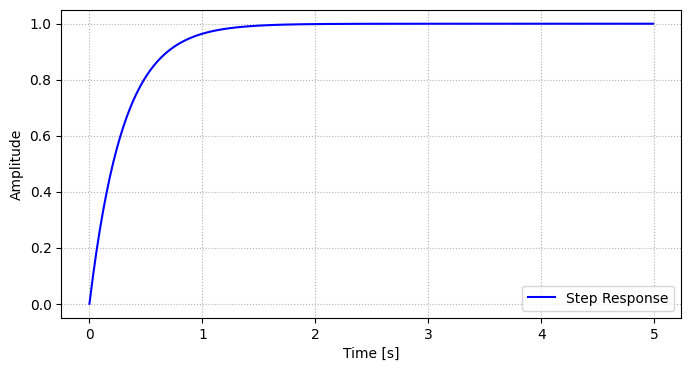

In [17]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctrl_matlab

T,K =0.3,1
P = ctrl_matlab.tf([0, K], [T, 1]) # 一阶滞后传递函数   
y,t =ctrl_matlab.step(P, T=np.arange(0, 5, 0.01)) # 步进响应

fig,ax = plt.subplots(1, 1, figsize=(8, 4)) # 创建一个图和一个子图
ax.plot(t, y, label='Step Response', color='blue') # 绘制步进响应
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图       



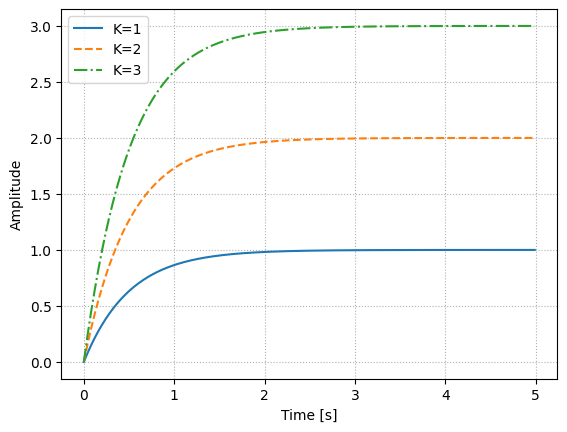

In [18]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctrl_matlab

LS=linestyle_generator() # 线型生成器
fig,ax= plt.subplots( ) # 创建一个图和一个子图
T = 0.5
K=[1,2,3]
for i in range(len(K)):
    P = ctrl_matlab.tf([0, K[i]], [T, 1]) # 一阶滞后传递函数
    y,t =ctrl_matlab.step(P, T=np.arange(0, 5, 0.01)) # 步进响应
    ax.plot(t, y, label=f'K={K[i]}', ls=next(LS)) # 绘制步进响应
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图


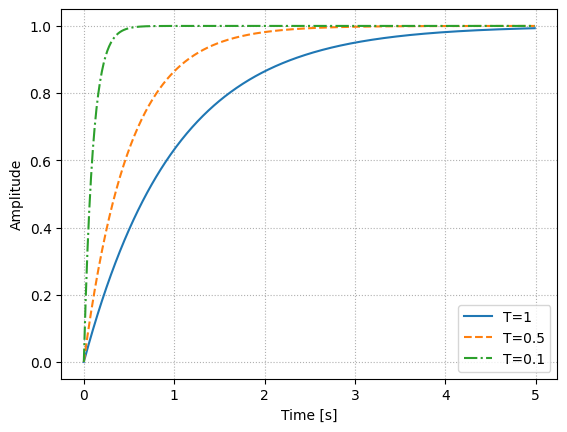

In [20]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctrl_matlab

LS=linestyle_generator() # 线型生成器
fig,ax= plt.subplots( ) # 创建一个图和一个子图
T = [1,0.5,0.1]
K=1
for i in range(len(T)):
    P = ctrl_matlab.tf([0, K], [T[i], 1]) # 一阶滞后传递函数
    y,t =ctrl_matlab.step(P, T=np.arange(0, 5, 0.01)) # 步进响应
    ax.plot(t, y, label=f'T={T[i]}', ls=next(LS)) # 绘制步进响应
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图


#### 一阶滞后阶跃响应 分式分解

$\psi(s)=\frac K {1+Ts}$

阶跃信号时 $u(s)=\frac 1s$

那么输出 $y(s)=\psi(s)u(s)=\frac K {1+Ts} \frac 1s$

做拉普拉斯变换

$y(t)=K(1-e^{-\frac 1T t})$


#### 传递函数分式分解

In [22]:
import sympy as sp
sp.init_printing() # 初始化打印 
s=sp.Symbol('s') # 定义符号变量
T=sp.Symbol('T') # 定义符号变量
K=sp.Symbol('K') # 定义符号变量
P = K/((1+T*s)*s)
sp.apart(P,s)

#### 传递函数逆拉普拉斯变换

In [23]:
import sympy as sp
sp.init_printing() # 初始化打印
s=sp.Symbol('s') # 定义符号变量
t=sp.Symbol('t',positive=True) # 定义符号变量
T=sp.Symbol('T',real=True) # 定义符号变量 
P = K/((1+T*s)*s)
sp.inverse_laplace_transform(P,s,t)

### 二阶滞后系统阶跃响应

#### RCL 电路

$ \Rho(s)=\frac1 {  RLs^2+CRs+1 } = \frac{\frac1{CL}}{s^2+\frac RC s + \frac1{CL}} $

$K =1,\omega_n+\sqrt{\frac1{CL}}, \zeta=\frac R2 \sqrt{\frac CL}=\frac R{2L\omega_n}$

$\Rho(s)=\frac{K\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}$

$\zeta为阻尼系数，\omega_n 为无阻尼自然振荡频率，K为幅值$

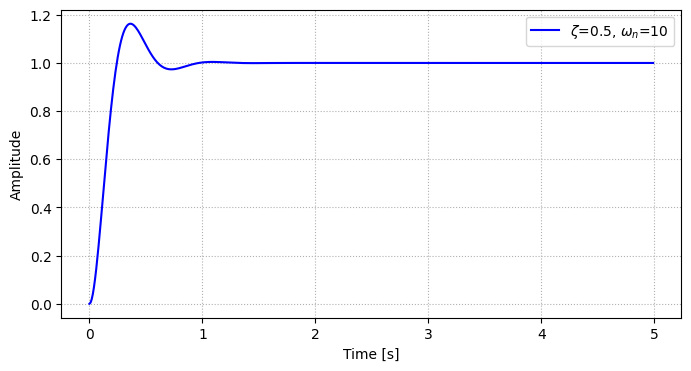

In [43]:
import control.matlab as ctrl_matlab
zeta  = 0.5
omega_n = 10
P =ctrl_matlab.tf([0,omega_n**2], [1, 2*zeta*omega_n, omega_n**2]) # 二阶系统传递函数  
y,t=ctrl_matlab.step(P, T=np.arange(0, 5, 0.01)) # 步进响应

fig,ax = plt.subplots(1, 1, figsize=(8, 4)) # 创建一个图和一个子图
ax.plot(t, y, label=f'$\zeta$={zeta}, $\omega_n$={omega_n}', color='blue') # 绘制步进响应
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图                                                                                                                                                                                                                                                                                                                                                          X  

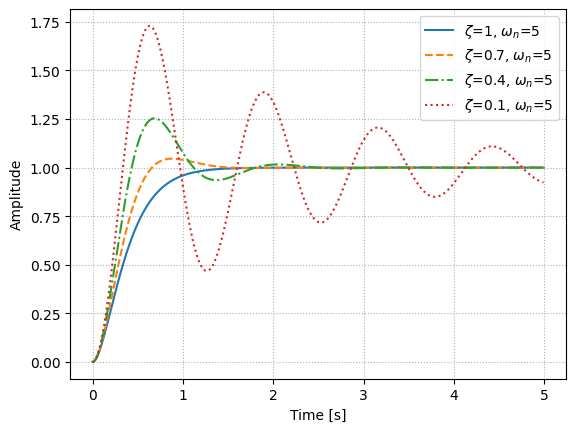

In [44]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctrl_matlab

LS=linestyle_generator() # 线型生成器
fig,ax= plt.subplots( ) # 创建一个图和一个子图

zeta = [1,0.7,0.4,0.1]
omega_n = 5 
for i in range(len(zeta)):
    P = ctrl_matlab.tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2]) # 二阶系统传递函数
    y,t =ctrl_matlab.step(P, T=np.arange(0, 5, 0.01)) # 步进响应
    ax.plot(t, y, label=f'$\zeta$={zeta[i]}, $\omega_n$={omega_n}', ls=next(LS)) # 绘制步进响应
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图


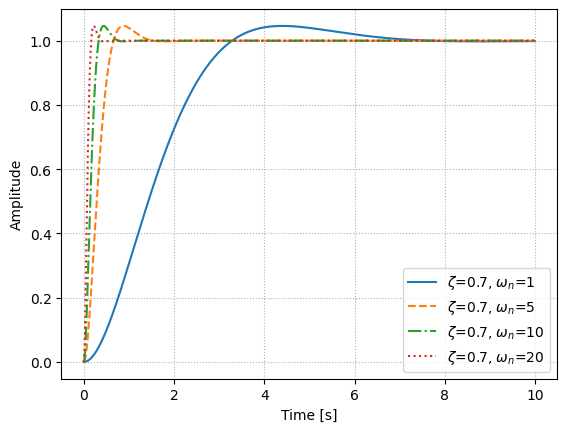

In [47]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctrl_matlab

LS=linestyle_generator() # 线型生成器
fig,ax= plt.subplots( ) # 创建一个图和一个子图


zeta=0.7
omega_n = [1,5,10,20]

for i in range(len(omega_n)):
    P = ctrl_matlab.tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2]) # 二阶系统传递函数
    y,t =ctrl_matlab.step(P, T=np.arange(0, 10, 0.01)) # 步进响应
    ax.plot(t, y, label=f'$\zeta$={zeta}, $\omega_n$={omega_n[i]}', ls=next(LS)) # 绘制步进响应     
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图  

### 习题
$\psi(s)=\frac{s+3}{(s+1)(s+2)}$

$\psi(s)=\frac1{s^3+2s^2+2s+1}$

In [58]:
import sympy as sp
sp.init_printing() # 初始化打印
s=sp.Symbol('s') # 定义符号变量
t=sp.Symbol('t',positive=True) # 定义符号变量
P = (s+3)/((s+1)*(s+2))
sp.apart(P,s)
sp.inverse_laplace_transform(P,s,t)

In [59]:
import sympy as sp
sp.init_printing() # 初始化打印
s=sp.Symbol('s') # 定义符号变量
t=sp.Symbol('t',positive=True) # 定义符号变量
P = 1/(s*s*s+2*s*s+2*s+1)
sp.apart(P,s)
sp.inverse_laplace_transform(P,s,t)

## 状态空间的时域响应

### 简单例子 

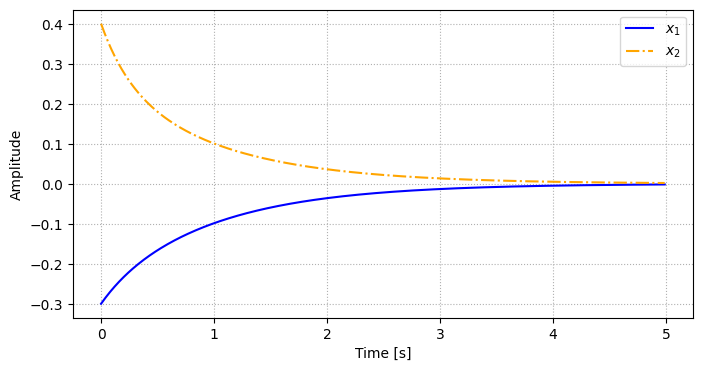

In [61]:
A = [ [0,1],[-4,-5]]
B=[[0],[1]]
C=np.eye(2) # 单位矩阵
D=np.zeros([2,1]) # 零矩阵  
P =ctrl_matlab. ss(A,B,C,D) # 状态空间模型

Td =np.arange(0, 5, 0.01) # 时间向量
x_0=[-0.3,0.4]
x,t=ctrl_matlab.initial(sys=P, T=Td, X0= x_0) # 初始状态响应
 
fig,ax = plt.subplots(1, 1, figsize=(8, 4))     

ax.plot(t, x[:,0], label='$x_1$', color='blue') # 绘制状态变量 x1
ax.plot(t, x[:,1], label='$x_2$', color='orange',ls='-.') #
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图


### 矩阵指数函数求解


有微分方程

$\dot x(t)=ax(t)$

解为

$x(t)=e^{At}x(0)$


$e^{At}为矩阵指数函数，也叫 状态迁移矩阵$

In [68]:
import sympy as sp
import numpy as np

sp.init_printing() # 初始化打印
s=sp.Symbol('s') # 定义符号变量
t=sp.Symbol('t',positive=True) # 定义符号变量

A = np.array([[0,1],[-4,-5]]) # 系统矩阵
G=s*sp.eye(2)-A # 系统矩阵的拉普拉斯变换
exp_At= sp.inverse_laplace_transform(sp.simplify(G.inv()),s,t) # 矩阵的拉普拉斯逆变换
# exp_At = sp.simplify(exp_At) # 简化表达式   
exp_At

⎡     -t    -4⋅t       -t    -4⋅t  ⎤
⎢  4⋅ℯ     ℯ          ℯ     ℯ      ⎥
⎢  ───── - ─────      ─── - ─────  ⎥
⎢    3       3         3      3    ⎥
⎢                                  ⎥
⎢     -t      -4⋅t     -t      -4⋅t⎥
⎢  4⋅ℯ     4⋅ℯ        ℯ     4⋅ℯ    ⎥
⎢- ───── + ───────  - ─── + ───────⎥
⎣    3        3        3       3   ⎦

查看某时刻的矩阵值

In [69]:
import scipy
A = np.array([[0,1],[-4,-5]]) # 系统矩阵
t=5
scipy.linalg.expm(A*t) # 矩阵指数函数

array([[ 0.00898393,  0.00224598],
       [-0.00898393, -0.00224598]])

### 零输入 零初值

$\dot x(t)=Ax(t)+Bu(t)$

$x(t)=e^{At} x(0) + \int_0^t e^{A(t-\tau)} B u(\tau) d\tau (t\geq0)$

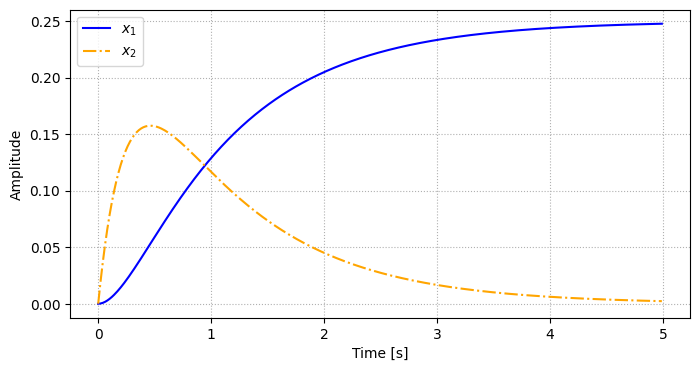

In [ ]:
Td =np.arange(0, 5, 0.01) # 时间向量
x,t=ctrl_matlab. step(P,T=  Td) # 零输入零初值响应  仅一个阶跃
fig,ax = plt.subplots(1, 1, figsize=(8, 4)) # 创建一个图和一个子图
ax.plot(t, x[:,0], label='$x_1$', color='blue') # 绘制状态变量 x1
ax.plot(t, x[:,1], label='$x_2$', color='orange',ls='-.') # 绘制状态变量 x2
plot_set(ax, 'Time [s]', 'Amplitude', 'best') # 设置图

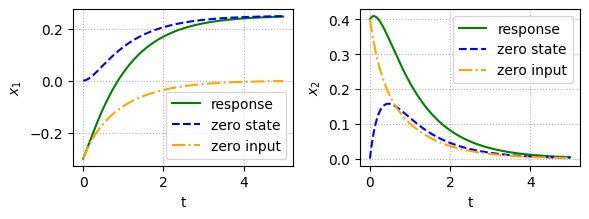

In [87]:
Td = np.arange(0, 5, 0.01) # 时间向量   
Ud=1*(Td>=0) # 单位阶跃输入
X0=[-0.3,0.4] # 初始状态

xst,t=ctrl_matlab.step(P, T=Td) # 零初值响应  
xin,_=ctrl_matlab.initial(P, T=Td, X0=X0) # 零输入
x,_,_=ctrl_matlab.lsim(P, U=Ud, T=Td, X0=X0) # 综合响应

fig,ax=plt.subplots(1, 2, figsize=(6,2.3)) # 创建一个图和一个子图

for i in [0,1]:
    ax[i].plot(t, x[:,i], label=f'response', color='green') # 绘制状态变量 x1 状态的响应
    ax[i].plot(t, xst[:,i], label=f'zero state', color='blue',ls='--') # 绘制状态变量 x1 #零初值响应
    ax[i].plot(t, xin[:,i], label=f'zero input', color='orange',ls='-.') # 绘制状态变量 x2 #零输入响应

plot_set(ax[0], 't', '$x_1$', 'best') # 设置图
plot_set(ax[1], 't', '$x_2$', 'best') # 设置 

fig.tight_layout() # 自动调整子图间距

试用其他输入和初值

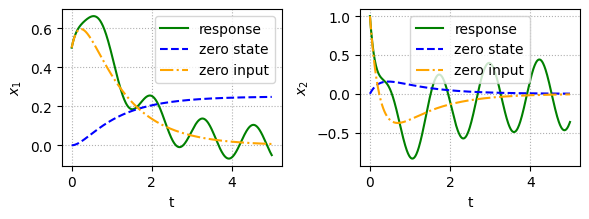

In [85]:
Td = np.arange(0, 5, 0.01) # 时间向量   
Ud=3*np.sin(5*Td) # 单位阶跃输入
X0=[0.5,1.0] # 初始状态

xst,t=ctrl_matlab.step(P, T=Td) # 零初值响应  
xin,_=ctrl_matlab.initial(P, T=Td, X0=X0) # 零输入
x,_,_=ctrl_matlab.lsim(P, U=Ud, T=Td, X0=X0) # 综合响应

fig,ax=plt.subplots(1, 2, figsize=(6,2.3)) # 创建一个图和一个子图

for i in [0,1]:
    ax[i].plot(t, x[:,i], label=f'response', color='green') # 绘制状态变量 x1 状态的响应
    ax[i].plot(t, xst[:,i], label=f'zero state', color='blue',ls='--') # 绘制状态变量 x1 #零初值响应
    ax[i].plot(t, xin[:,i], label=f'zero input', color='orange',ls='-.') # 绘制状态变量 x2 #零输入响应

plot_set(ax[0], 't', '$x_1$', 'best') # 设置图
plot_set(ax[1], 't', '$x_2$', 'best') # 设置 

fig.tight_layout() # 自动调整子图间距

## 稳定性

主要就是分析系统输入输出是否发散，其实 只要所有极点实部为负数就判定系统输入输出有界，这个条件充分且必要

### 极点问题

In [93]:
# 一阶滞后系统 K=1 T =1，-1
print("一阶滞后系统 K=1 T =1,-1 的极点")
P1=ctrl_matlab.tf([0,1],[1,1])
print('P1:',ctrl_matlab.pole(P1)) # 打印极点
P2=ctrl_matlab.tf([0,1],[-1,1])
print('P2:',ctrl_matlab.pole(P2)) # 打印极点

#二阶滞后系统 K=1 omega_n=1 zeta=0.025,-0.025
print(f'二阶滞后系统 K=1 $\omega_n$=1 $\zeta$=0.025,-0.025 的极点')
P3=ctrl_matlab.tf([0,1],[1,0.025*2,1])
print('P3:',ctrl_matlab.pole(P3)) # 打印极点
P4=ctrl_matlab.tf([0,1],[1,-0.025*2,2])
print('P4:',ctrl_matlab.pole(P4)) # 打印极点


一阶滞后系统 K=1 T =1,-1 的极点
P1: [-1.+0.j]
P2: [1.+0.j]
二阶滞后系统 K=1 $\omega_n$=1 $\zeta$=0.025,-0.025 的极点
P3: [-0.025+0.99968745j -0.025-0.99968745j]
P4: [0.025+1.41399257j 0.025-1.41399257j]


### 渐进稳定性

有界输入一定得到有界输出，反之不一定

In [94]:
#求矩阵特征值
A = np.array([[0,1],[-4,-5]]) # 系统矩阵
np.linalg.eigvals(A)



array([-1., -4.])

### 相平面图

简单的状态空间 根据矩阵特征值 可得如下连等式

$\dot x = A x =\lambda x$

矩阵A的特征向量在相平面图内为两条直线，该直线为*不变子空间*，一旦达到该线状态就沿着线变化了

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


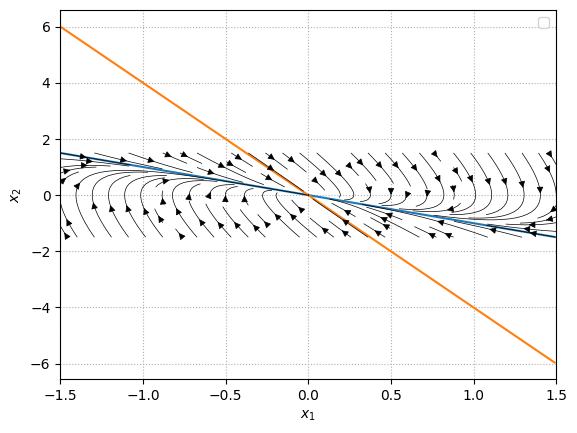

In [110]:
w=1.5
Y,X=np.mgrid[-w:w:100j, -w:w:100j] # 创建网格
A = np.array([[0,1],[-4, -5]]) # 系统矩阵    
s,v =np.linalg.eig(A) # 求特征值和特征向量

U=A[0,0]*X + A[0,1]*Y # 计算 U
V=A[1,0]*X + A[1,1]*Y # 计算 V

t=np.arange(-1.5, 1.5, 0.01) # 时间向量
fig,ax=plt.subplots( ) # 创建一个图和一个子图

#绘制不变空间线
if s.imag[0] == 0 and s.imag[1]==0: # 如果特征值实数
    ax.plot(t,(v[1,0]/v[0,0])*t,   ls='-') 
    ax.plot(t,(v[1,1]/v[0,1])*t,   ls='-') 

ax.streamplot(X,Y,U,V,density=1, color='k', linewidth=0.5) # 绘制流线图  
plot_set(ax, '$x_1$', '$x_2$', 'best' ) # 设置图

## 频率响应

### 冲激函数

利用不同频率的余弦函数可构造冲激

那么可用不同频率余弦函数输入系统查看响应，而后分析系统

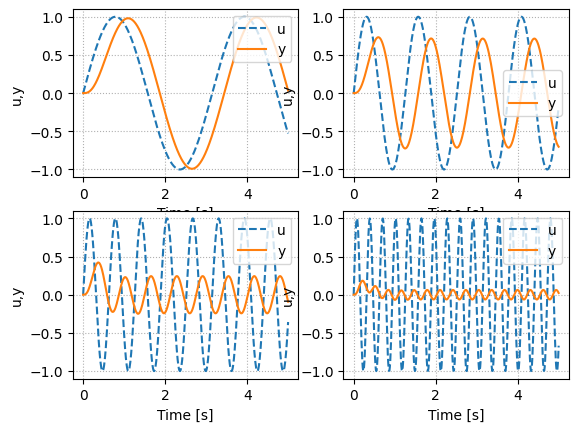

In [113]:
fig,ax = plt.subplots(2, 2) # 创建一个图和两个子图
zeta = 0.7
omega_n = 5
P =ctrl_matlab.tf([0,omega_n**2], [1, 2*zeta*omega_n, omega_n**2]) # 二阶系统传递函数

FREQ = [2,5,10,20]
Td = np.arange(0, 5, 0.01) # 时间向量
for i in range(2):
    for j in range(2):
        u=np.sin(FREQ[2*i+j]*Td) # 生成正弦波输入
        y,t,x0=ctrl_matlab.lsim(P, U=u, T=Td, X0=[0,0] )

        ax[i,j].plot(t,u,ls='--',label='u') # 绘制输入
        ax[i,j].plot(t,y ,label='y') # 绘制输入
        plot_set(ax[i,j], 'Time [s]', 'u,y', 'best')

ax[0,0].legend(loc='upper right') # 设置图例位置

### 一阶滞后系统波特图

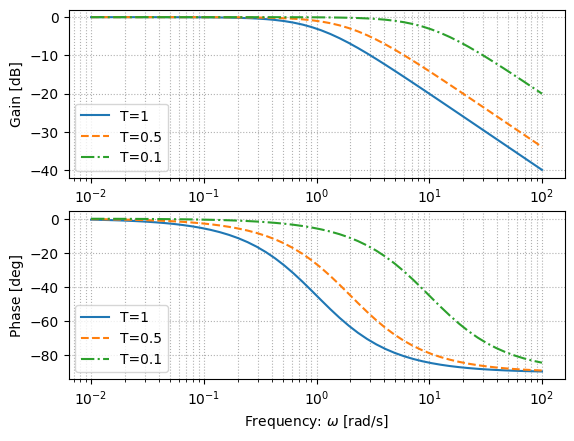

In [119]:
K= 1 
T = [1,0.5,0.1] 

LS = linestyle_generator() # 线型生成器
fig,ax= plt.subplots( 2,1) # 创建一个图和一个子图
for i in range(len(T)): 
    P = ctrl_matlab.tf([0, K], [T[i], 1]) # 一阶滞后传递函数
    gain,pharse,w = ctrl_matlab.bode(P,ctrl_matlab.logspace(-2,2), dB=True, Hz=False, deg=True, plot=False) # 计算幅值、相位和频率
    pltargs={'ls':next(LS), 'label':f'T={T[i]}'} # 设置绘图参数
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs ),
    ax[1].semilogx(w, pharse*180/np.pi, **pltargs ),

bodeplot_set(ax,3,3, 'best') # 设置图


In [123]:
import sympy as sp
sp.init_printing() # 初始化打印 
s=sp.Symbol('s') # 定义符号变量
T=sp.Symbol('T') # 定义符号变量
K=sp.Symbol('K') # 定义符号变量
w =sp.Symbol('w' ) # 定义符号变量
P = K*s/((1+T*s)*(s*s+w*w))
sp.apart(P,s)
sp.inverse_laplace_transform(P,s,t)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'